In [454]:
#!pip install plotly

In [455]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px

In [456]:
link = "./rotten_tomatoes_critic_reviews_tokens.csv"
link2 ='./rotten_tomatoes_movies.csv'

critic_reviews = pd.read_csv(link, converters={'review_date': pd.to_datetime})
movies = pd.read_csv(link2, converters={'original_release_date': pd.to_datetime, 'streaming_release_date': pd.to_datetime})


# Normalize the score for each review on 100

In [457]:
# method to convert format rate 3/5 to float
def get_score(x):
    x = x.replace(" ", "")
    letters = {"A":14, "B":11, "C":8,"D":5,"E":2, "F":0}
        #convert string "3.4/5" or "67/100" to rate on 100
    if (type(x)==str) and ('/' in x) and (float(x.split("/")[1]) > float(x.split("/")[0])):
        return 100*(float(x.split("/")[0]) / float(x.split("/")[1]))
    elif x[0] in letters.keys():
        #convert letters rate to rate on 100
        return 100*((letters[x[0]] + 44 - ord(x[1]) if len(x)>1 and x[1] in "-+" else letters[x[0]])/15)


critic_reviews["review_score_float"] = critic_reviews[critic_reviews["review_score"].isna()==False]["review_score"].apply(get_score)
critic_reviews[critic_reviews["review_score_float"].isna()==False]["review_score_float"]

3          70.000000
6          25.000000
7          70.000000
8          73.333333
9          60.000000
             ...    
1130012    40.000000
1130013    70.000000
1130014    80.000000
1130015    70.000000
1130016    53.333333
Name: review_score_float, Length: 777569, dtype: float64

In [458]:
critic_reviews.describe()

,Unnamed: 0,review_score_float
count,1.130017e+06,777569.000000
mean,5.650080e+05,61.542096
std,3.262080e+05,19.459735
min,0.000000e+00,0.000000
25%,2.825040e+05,50.000000
50%,5.650080e+05,62.500000
75%,8.475120e+05,80.000000
max,1.130016e+06,99.900000


# Merge audience score with review table

In [459]:
#movies.columns

In [460]:
#critic_reviews.columns

In [461]:
critic_reviews = critic_reviews.merge(movies[["rotten_tomatoes_link", "audience_rating"]], on="rotten_tomatoes_link")

In [462]:
critic_reviews.loc[~critic_reviews['review_score_float'].isna()].head()

,Unnamed: 0,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content,review_score_float,tokens,audience_rating
3,3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...,70.000000,"['whether', 'audiences', 'will', 'get', 'behin...",53.0
6,6,m/0814255,Nick Schager,False,Slant Magazine,Rotten,1/4,2010-02-10,Harry Potter knockoffs don't come more transpa...,25.000000,"['harry', 'potter', 'knockoffs', 'do', ""n't"", ...",53.0
7,7,m/0814255,Bill Goodykoontz,True,Arizona Republic,Fresh,3.5/5,2010-02-10,"Percy Jackson isn't a great movie, but it's a ...",70.000000,"['percy', 'jackson', 'is', ""n't"", 'a', 'great'...",53.0
8,8,m/0814255,Jordan Hoffman,False,UGO,Fresh,B,2010-02-10,"Fun, brisk and imaginative",73.333333,"['fun', ',', 'brisk', 'and', 'imaginative']",53.0
9,9,m/0814255,Jim Schembri,True,The Age (Australia),Fresh,3/5,2010-02-10,"Crammed with dragons, set-destroying fights an...",60.000000,"['crammed', 'with', 'dragons', ',', 'set-destr...",53.0


# Get the top 10 publishers near to the audience rating

I created a new column with a calcul of the difference of audience and critic convert to absolute value then convert as %.
To be able to compare more I substract with  1. In this way the highest is the score more closer the magasin is with the audience rating

In [463]:
critic_reviews["difference_rating_audience_vs_critics"] = 1 - (critic_reviews["audience_rating"] - critic_reviews["review_score_float"]).abs()/100



In [464]:
critic_reviews["difference_rating_audience_vs_critics"].describe()

count    774953.000000
mean          0.842579
std           0.127166
min           0.040000
25%           0.770000
50%           0.870000
75%           0.940000
max           1.000000
Name: difference_rating_audience_vs_critics, dtype: float64

In [465]:
table_pivot = pd.pivot_table(critic_reviews, values=["difference_rating_audience_vs_critics"], index=['publisher_name'], aggfunc=['mean', "std", "count", "max"])
table_pivot.sort_values([('mean','difference_rating_audience_vs_critics'),('std', 'difference_rating_audience_vs_critics'),('count', 'difference_rating_audience_vs_critics')], ascending=[0,1,0]).head(10)

,mean,std,count,max
,difference_rating_audience_vs_critics,difference_rating_audience_vs_critics,difference_rating_audience_vs_critics,difference_rating_audience_vs_critics
publisher_name,,,,
Polygon,1.000000,0.000000,2,1.000000
Women Rocking Hollywood,1.000000,NaN,1,1.000000
Horror Squad,0.990000,0.000000,2,0.990000
Cinegarage,0.990000,NaN,1,0.990000
Mansized,0.990000,NaN,1,0.990000
doghatesfilm.com,0.990000,NaN,1,0.990000
Odyssey,0.986667,NaN,1,0.986667
White Plains Times,0.983333,NaN,1,0.983333


In [466]:
table_pivot.describe()

,mean,std,count,max
,difference_rating_audience_vs_critics,difference_rating_audience_vs_critics,difference_rating_audience_vs_critics,difference_rating_audience_vs_critics
count,1607.000000,1475.000000,2230.000000,1607.000000
mean,0.835683,0.121029,347.512556,0.970466
std,0.061650,0.036163,923.806485,0.075190
min,0.240000,0.000000,0.000000,0.240000
25%,0.819791,0.106487,0.000000,0.980000
50%,0.843393,0.120554,18.000000,1.000000
75%,0.863789,0.136908,228.000000,1.000000
max,1.000000,0.341223,8487.000000,1.000000


In [467]:
table_pivot.columns

MultiIndex([( 'mean', 'difference_rating_audience_vs_critics'),
            (  'std', 'difference_rating_audience_vs_critics'),
            ('count', 'difference_rating_audience_vs_critics'),
            (  'max', 'difference_rating_audience_vs_critics')],
           )

I select 25% of magasins that have a count of difference > of quantile .75

Then I sort the result by mean of the difference after the standard deviation

In [468]:
table_pivot_2.quantile(.000001)[('std','difference_rating_audience_vs_critics')]

0.07913278497603604

In [469]:
table_pivot_2 = table_pivot[table_pivot[('count','difference_rating_audience_vs_critics')] > table_pivot.quantile(.75)[('count','difference_rating_audience_vs_critics')]]
table_pivot_2 = table_pivot_2[table_pivot_2[('std','difference_rating_audience_vs_critics')] < table_pivot_2.quantile(.10)[('std','difference_rating_audience_vs_critics')]]
table_pivot_2.sort_values([('mean','difference_rating_audience_vs_critics'),('std', 'difference_rating_audience_vs_critics')], ascending=[0,1]).head(10)

,mean,std,count,max
,difference_rating_audience_vs_critics,difference_rating_audience_vs_critics,difference_rating_audience_vs_critics,difference_rating_audience_vs_critics
publisher_name,,,,
Cinemania,0.903066,0.079132,287,1.000000
Seacoast Newspapers (NH/Maine),0.894778,0.091069,237,1.000000
TheDivaReview.com,0.883457,0.096707,350,1.000000
Old School Reviews,0.882777,0.098163,713,0.996667
Cinemaclips.com,0.881412,0.091017,340,1.000000
Florida Times-Union,0.881042,0.098348,240,1.000000
American Profile,0.880590,0.095095,305,1.000000
Schmoes Know,0.880069,0.095140,835,1.000000


In [470]:
publishers_list = list(table_pivot_2.sort_values([('mean','difference_rating_audience_vs_critics'),('std', 'difference_rating_audience_vs_critics')], ascending=[0,1]).head(10).index)
publishers_list



['Cinemania',
 'Seacoast Newspapers (NH/Maine)',
 'TheDivaReview.com',
 'Old School Reviews',
 'Cinemaclips.com',
 'Florida Times-Union',
 'American Profile',
 'Schmoes Know',
 'Movie Metropolis',
 'Independent Online (South Africa)']

<Figure size 432x288 with 0 Axes>

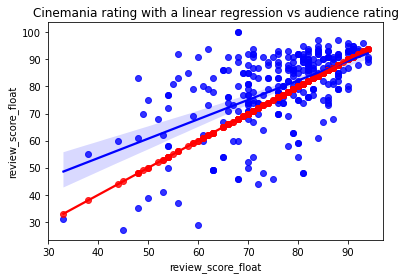

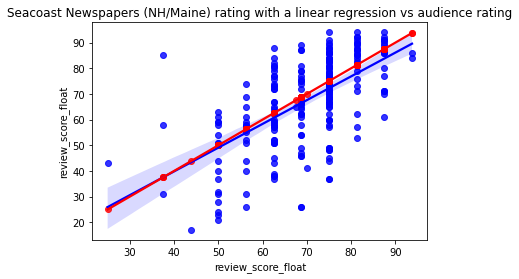

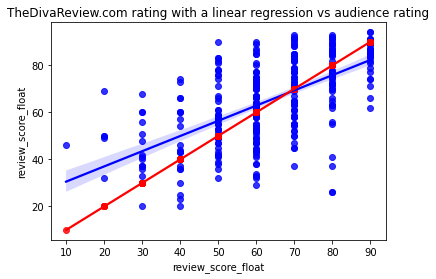

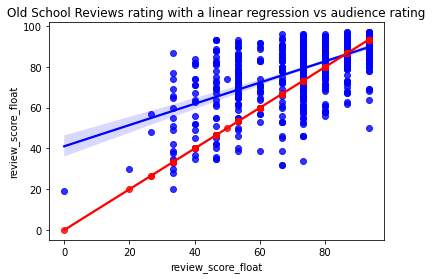

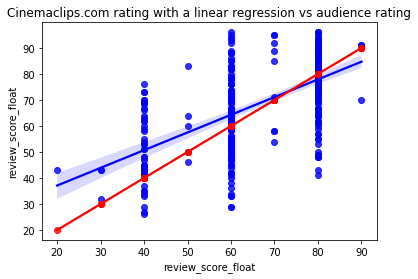

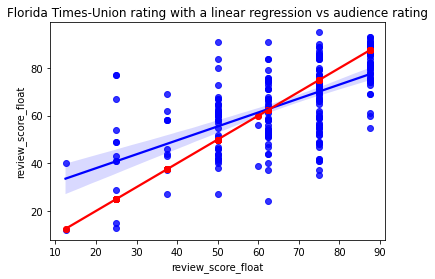

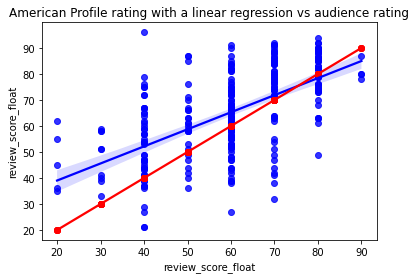

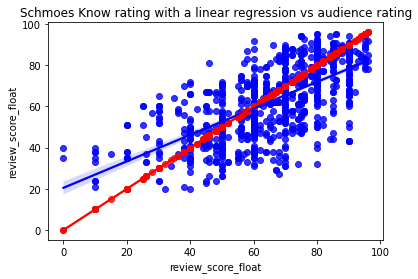

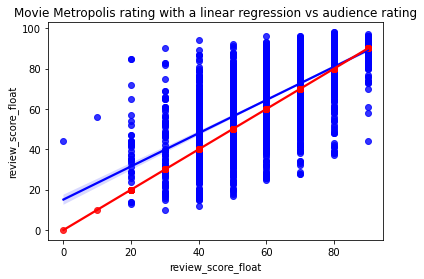

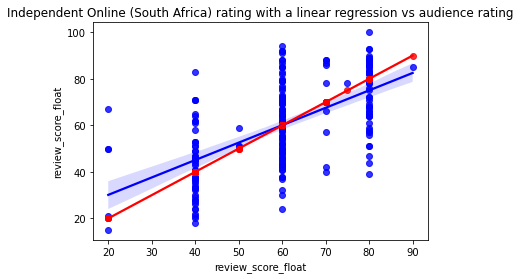

In [471]:
fig = plt.figure()

for publisher in publishers_list:
    fig, ax = plt.subplots()
    x = critic_reviews[(critic_reviews.publisher_name == publisher) & ~(critic_reviews["difference_rating_audience_vs_critics"].isna())]["review_score_float"]
    y = critic_reviews[(critic_reviews.publisher_name == publisher) & ~(critic_reviews["difference_rating_audience_vs_critics"].isna())]["audience_rating"]
    sns.regplot(x=x, y=y, color="blue", ax=ax)
    sns.regplot(x=x, y=x, color="red", ax=ax)
    ax.set( title = f"{publisher} rating with a linear regression vs audience rating" )
    

# Correlation heatmaps

I will do a correlation between the magasin list vs audience rating from previous table

In [472]:
#critic_reviews[critic_reviews.publisher_name.str.contains("|".join(publishers_list))]
#critic_reviews.publisher_name.str.contains("|".join(publishers_list))
critic_reviews.publisher_name.isin(publishers_list)

0          False
1          False
2          False
3          False
4          False
           ...  
1129882    False
1129883    False
1129884    False
1129885    False
1129886    False
Name: publisher_name, Length: 1129887, dtype: bool

In [483]:
publishers_corr = pd.pivot_table(critic_reviews[critic_reviews.publisher_name.isin(publishers_list)],
               values=["review_score_float"], index="rotten_tomatoes_link", columns=['publisher_name'])\
                .merge(movies[["rotten_tomatoes_link", "audience_rating"]], on="rotten_tomatoes_link")
#publishers_corr.info()
#publishers_corr = publishers_corr.fillna(0)
publishers_corr.sort_values("audience_rating", ascending=False)

/var/folders/ts/l4jvqvn135g1lpkckf7t5cmc0000gn/T/ipykernel_2567/1205211482.py:1: FutureWarning:

merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)



,rotten_tomatoes_link,"(review_score_float, American Profile)","(review_score_float, Cinemaclips.com)","(review_score_float, Cinemania)","(review_score_float, Florida Times-Union)","(review_score_float, Independent Online (South Africa))","(review_score_float, Movie Metropolis)","(review_score_float, Old School Reviews)","(review_score_float, Schmoes Know)","(review_score_float, Seacoast Newspapers (NH/Maine))","(review_score_float, TheDivaReview.com)",audience_rating
3159,m/stay_human,NaN,NaN,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
1019,m/canary_2018,NaN,NaN,NaN,NaN,80.0,NaN,NaN,NaN,NaN,NaN,100.0
2999,m/shawshank_redemption,NaN,NaN,NaN,NaN,NaN,80.0,NaN,NaN,NaN,NaN,98.0
1113,m/city_of_god,NaN,NaN,88.0,NaN,NaN,80.0,93.333333,NaN,NaN,NaN,97.0
1872,m/ikiru,NaN,NaN,NaN,NaN,NaN,NaN,93.333333,NaN,NaN,NaN,97.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1061,m/charlie_brown_christmas,NaN,NaN,NaN,NaN,NaN,70.0,NaN,NaN,NaN,NaN,NaN
2006,m/joy_ride,NaN,NaN,NaN,NaN,NaN,70.0,NaN,NaN,NaN,NaN,NaN
3531,m/the_remarkable_life_of_john_weld,NaN,NaN,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3629,m/time_for_drunken_horses,NaN,NaN,NaN,NaN,NaN,NaN,73.333333,NaN,NaN,NaN,NaN


In [485]:
#publishers_corr.corr(min_periods=200)[["audience_rating"]]
publishers_corr.corr(min_periods=200).sort_values("audience_rating", ascending=False)[1:20]

,"(review_score_float, American Profile)","(review_score_float, Cinemaclips.com)","(review_score_float, Cinemania)","(review_score_float, Florida Times-Union)","(review_score_float, Independent Online (South Africa))","(review_score_float, Movie Metropolis)","(review_score_float, Old School Reviews)","(review_score_float, Schmoes Know)","(review_score_float, Seacoast Newspapers (NH/Maine))","(review_score_float, TheDivaReview.com)",audience_rating
"(review_score_float, Schmoes Know)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.689457
"(review_score_float, Movie Metropolis)",NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.671686
"(review_score_float, Seacoast Newspapers (NH/Maine))",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.620816
"(review_score_float, Independent Online (South Africa))",NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.614816
"(review_score_float, TheDivaReview.com)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.611527
"(review_score_float, American Profile)",1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.608181
"(review_score_float, Florida Times-Union)",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.602142
"(review_score_float, Old School Reviews)",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.595441
"(review_score_float, Cinemaclips.com)",NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.580564
"(review_score_float, Cinemania)",NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.577914


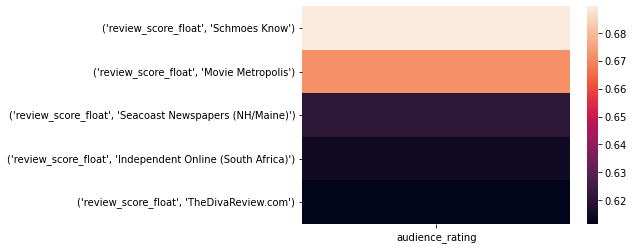

In [497]:
#fig = px.imshow(publishers_corr.corr(min_periods=200).sort_values("audience_rating", ascending=False)[1:6])
#fig.show()
ax = sns.heatmap(publishers_corr.corr(min_periods=200)[["audience_rating"]].sort_values("audience_rating", ascending=False)[1:6])

# Top 10 of correlation


In [476]:
publishers_corr_2 = pd.pivot_table(critic_reviews,
               values=["review_score_float"], index="rotten_tomatoes_link", columns=['publisher_name'])\
                .merge(movies[["rotten_tomatoes_link", "audience_rating"]], on="rotten_tomatoes_link")
#publishers_corr.info()
#publishers_corr = publishers_corr.fillna(0)
publishers_corr_2#.dropna(subset=['audience_rating']).info()

/var/folders/ts/l4jvqvn135g1lpkckf7t5cmc0000gn/T/ipykernel_2567/3334151769.py:1: FutureWarning:

merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)



,rotten_tomatoes_link,"(review_score_float, 1428 Elm)","(review_score_float, 1More Film Blog)","(review_score_float, 2 Minute Telly)","(review_score_float, 24 Horas)","(review_score_float, 25YL (25 Years Later))","(review_score_float, 2UE That Movie Show)","(review_score_float, 3AW)","(review_score_float, 3BlackChicks Review)","(review_score_float, 4:3)",...,"(review_score_float, thelmadams.com)","(review_score_float, thelondonpaper)","(review_score_float, them.)","(review_score_float, tonymacklin.net)","(review_score_float, tonymedley.com)","(review_score_float, vocalo.org)","(review_score_float, www.kcactive.com)","(review_score_float, www.susangranger.com)","(review_score_float, ÜberCiné)",audience_rating
0,m/0814255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,30.0,NaN,NaN,NaN,NaN,53.0
1,m/0878835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,64.0
2,m/10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.0
3,m/1000013-12_angry_men,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.0
4,m/1000079-20000_leagues_under_the_sea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17662,m/zoot_suit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0
17663,m/zootopia,NaN,NaN,NaN,NaN,NaN,NaN,80.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.0
17664,m/zorba_the_greek,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.0
17665,m/zulu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.0


There are too much Nan to have a values so I set a parameter to get corrlation if observations are greater than 220 then select only the column audience rating.

In [477]:
#publishers_corr.corr()
corr_audience_min200 = publishers_corr_2.corr(min_periods=220)[["audience_rating"]]
#corr_audience_min200[~corr_audience_min200["audience_rating"].isna()]

In [478]:
#publishers_corr.corrwith(publishers_corr[["audience_rating"]])
list((corr_audience_min200["audience_rating"]).sort_values(ascending=False).head(10).index)

['audience_rating',
 ('review_score_float', 'Schmoes Know'),
 ('review_score_float', 'Movie Metropolis'),
 ('review_score_float', 'The Times of India'),
 ('review_score_float', 'EnPrimeur.ca'),
 ('review_score_float', 'The Coast (Halifax, Nova Scotia)'),
 ('review_score_float', 'ChrisStuckmann.com'),
 ('review_score_float', 'Cairo360'),
 ('review_score_float', 'sbs.is'),
 ('review_score_float', 'Movie Views')]

In [479]:
ix_list = (corr_audience_min200["audience_rating"]**2).sort_values(ascending=False)[1:11].index

In [ ]:
fig = px.imshow(publishers_corr_2.corr(min_periods=220))
fig.show()

In [ ]:
fig = plt.figure()

for ix in ix_list:
    publisher = ix[1]
    fig, ax = plt.subplots()
    x = critic_reviews[(critic_reviews.publisher_name == publisher) & ~(critic_reviews["difference_rating_audience_vs_critics"].isna())]["review_score_float"]
    y = critic_reviews[(critic_reviews.publisher_name == publisher) & ~(critic_reviews["difference_rating_audience_vs_critics"].isna())]["audience_rating"]
#    print(x.isna().sum())
#   print(y.isna().sum())
    sns.regplot(x=x, y=y, color="blue", ax=ax)
    sns.regplot(x=x, y=x, color="red", ax=ax)
    ax.set( title = f"{publisher} rating with a linear regression vs audience rating" )
    ax.set_ylabel("Audience rating")
    